+ Download the HTML
+ Parse HTML

+ BeautifulSoup

+ BeautifulSoup has multiple parsers for parsing our data.

+ data.get_text gets all data on that webpage without specifying tags.
+ data.a will return first occurence of anchor.
+ Similarly data.find will return first hit. 
+ We can keep nesting here.
+ data.find_all will return all hits
+ children versus descendents versus siblings

In [2]:
from bs4 import BeautifulSoup
import requests
response = requests.get('http://info.cern.ch/hypertext/WWW/TheProject.html')
data = BeautifulSoup(response.text,'lxml')
data

print(data.title)
print(data.a)
print(data.title.string)
print(data.head)

<title>The World Wide Web project</title>
<a href="WhatIs.html" name="0">
hypermedia</a>
The World Wide Web project
None


In [17]:
links = data.find_all('a')
type(links)
for i in links:
    print(i.string)


hypermedia
executive
summary
Mailing lists
Policy
W3  news
Frequently Asked Questions
What's out there?
 subjects
W3 servers
Help
Software Products
Line Mode
Viola
NeXTStep
Servers
Tools
 Mail robot

Library
Technical
Bibliography
People
History
How can I help
Getting code

anonymous FTP


In [41]:
dd = data.find_all('dd')

for i in dd:
    for s in i.children:
        print(s.string)

 Pointers to the
world's online information,
 subjects

, 
W3 servers
, etc.

 on the browser you are using

 A list of W3 project
components and their current state.
(e.g. 
Line Mode
 ,X11 
Viola
 ,  
NeXTStep

, 
Servers
 , 
Tools
 ,
 Mail robot
 ,

Library
 )

 Details of protocols, formats,
program internals etc

 Paper documentation
on  W3 and references.

 A list of some people involved
in the project.

 A summary of the history
of the project.

 If you would like
to support the web..

 Getting the code by

anonymous FTP
 , etc.



In [67]:
webpage = BeautifulSoup('<a> <b> <h1> "Hello" </h1> <h2> "Hi" </h2> </b> <c> <h3> "Hello" </h3> <h4> Hello </h4> </c> </a>','lxml')

#t = webpage.find_all('a')

type(webpage.a.descendants)

type(webpage.a.children)
l = list(webpage.a.children)

TypeError: 'list' object is not callable

In [17]:
response = requests.get('http://books.toscrape.com/')

data =  BeautifulSoup(response.text,'lxml')

header = data.find_all('article',class_ = 'product_pod')
#print(header)
for i in header:
    print(i.h3.a.get('title'))


A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [19]:
for i in header:
    url = i.h3.a.get('href')
    print('http://books.toscrape.com/'+ url)
    

http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
http://books.toscrape.com/catalogue/soumission_998/index.html
http://books.toscrape.com/catalogue/sharp-objects_997/index.html
http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
http://books.toscrape.com/catalogue/the-requiem-red_995/index.html
http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
http://books.toscrape.com/catalogue/the-black-maria_991/index.html
http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
http://books.toscrape.com/cata

In [22]:
response = requests.get('http://books.toscrape.com/')

data =  BeautifulSoup(response.text,'lxml')

header = data.find_all('ol',class_ = 'row')
print(len(header))
li = header[0].find_all('li')
print(len(li))
#print(header)
for i in header:
    print(i.h3.a.get('title'))

1
20
A Light in the Attic


In [28]:
response = requests.get('http://books.toscrape.com/')
data = BeautifulSoup(response.text,'lxml')
Class = data.find_all('ul',class_ = 'nav nav-list')
len(Class)
Categories = Class[0].find_all('ul')
len(Categories)
Categories = Categories[0].find_all('li')
for i in Categories:
    print(i.a.string)


                            
                                Travel
                            
                        

                            
                                Mystery
                            
                        

                            
                                Historical Fiction
                            
                        

                            
                                Sequential Art
                            
                        

                            
                                Classics
                            
                        

                            
                                Philosophy
                            
                        

                            
                                Romance
                            
                        

                            
                                Womens Fiction
                            
     

In [49]:

response = requests.get('http://books.toscrape.com/catalogue/category/books_1/page-50.html')

data =  BeautifulSoup(response.text,'lxml')


url_current = data.find_all('li',class_ = 'next')
#url_current = url_current[0].a.get('href')
#url_current = 'http://books.toscrape.com/' + url_current
#url_current

IndexError: list index out of range

In [48]:
def getbooksofallpages(data):
    li = []
    data =  BeautifulSoup(response.text,'lxml')

    header = data.find_all('article',class_ = 'product_pod')
    #print(header)
    for i in header:
        print(i.h3.a.get('title'))
        li.append(i.h3.a.get('title'))
    return li
        
def url_current(data):
    url_current = data.find_all('li',class_ = 'next')
    if url_current!= 
    url_current = url_current[0].a.get('href').split('/')[-1]
    #print(url_current)
    url_current = 'http://books.toscrape.com/catalogue/' + url_current
    return url_current
response = requests.get('http://books.toscrape.com/') 
li = []
url = ''
while(response.status_code == 200):
    data =  BeautifulSoup(response.text,'lxml')
    li.extend(getbooksofallpages(data))
    url = url_current(data)
    print(url)
    response = requests.get(url)
print(len(li))    

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas
http://books.toscrape.com/catalogue/page-2.html
In Her Wake
How Music Works
Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More
Chase Me (Paris Night

Modern Romance
Miss Peregrineâs Home for Peculiar Children (Miss Peregrineâs Peculiar Children #1)
Louisa: The Extraordinary Life of Mrs. Adams
Little Red
Library of Souls (Miss Peregrineâs Peculiar Children #3)
Large Print Heart of the Pride
I Had a Nice Time And Other Lies...: How to find love & sh*t like that
Hollow City (Miss Peregrineâs Peculiar Children #2)
Grumbles
Full Moon over Noahâs Ark: An Odyssey to Mount Ararat and Beyond
Frostbite (Vampire Academy #2)
Follow You Home
First Steps for New Christians (Print Edition)
Finders Keepers (Bill Hodges Trilogy #2)
Fables, Vol. 1: Legends in Exile (Fables #1)
Eureka Trivia 6.0
Drive: The Surprising Truth About What Motivates Us
Done Rubbed Out (Reightman & Bailey #1)
Doing It Over (Most Likely To #1)
Deliciously Ella Every Day: Quick and Easy Recipes for Gluten-Free Snacks, Packed Lunches, and Simple Meals
http://books.toscrape.com/catalogue/page-11.html
Dark Notes
Daring Greatly: How the Courage to Be Vulnerable Transform

Hide Away (Eve Duncan #20)
Furiously Happy: A Funny Book About Horrible Things
Everyday Italian: 125 Simple and Delicious Recipes
Equal Is Unfair: America's Misguided Fight Against Income Inequality
Eleanor & Park
Dirty (Dive Bar #1)
Can You Keep a Secret? (Fear Street Relaunch #4)
Boar Island (Anna Pigeon #19)
A Paris Apartment
A la Mode: 120 Recipes in 60 Pairings: Pies, Tarts, Cakes, Crisps, and More Topped with Ice Cream, Gelato, Frozen Custard, and More
Troublemaker: Surviving Hollywood and Scientology
The Widow
The Sleep Revolution: Transforming Your Life, One Night at a Time
The Improbability of Love
The Art of Startup Fundraising
Take Me Home Tonight (Rock Star Romance #3)
Sleeping Giants (Themis Files #1)
Setting the World on Fire: The Brief, Astonishing Life of St. Catherine of Siena
Playing with Fire
Off the Hook (Fishing for Trouble #1)
http://books.toscrape.com/catalogue/page-21.html
Mothering Sunday
Mother, Can You Not?
M Train
Lilac Girls
Lies and Other Acts of Love
Lab 

World Without End (The Pillars of the Earth #2)
Will Grayson, Will Grayson (Will Grayson, Will Grayson)
Why Save the Bankers?: And Other Essays on Our Economic and Political Crisis
Where She Went (If I Stay #2)
What If?: Serious Scientific Answers to Absurd Hypothetical Questions
Two Summers
This Is Your Brain on Music: The Science of a Human Obsession
The Secret Garden
The Raven King (The Raven Cycle #4)
The Raven Boys (The Raven Cycle #1)
The Power Greens Cookbook: 140 Delicious Superfood Recipes
The Metamorphosis
The Mathews Men: Seven Brothers and the War Against Hitler's U-boats
The Little Paris Bookshop
The Hiding Place
The Grand Design
The Firm
The Fault in Our Stars
The False Prince (The Ascendance Trilogy #1)
The Expatriates
http://books.toscrape.com/catalogue/page-31.html
The Dream Thieves (The Raven Cycle #2)
The Darkest Corners
The Crossover
The 5th Wave (The 5th Wave #1)
Tell the Wind and Fire
Tell Me Three Things
Talking to Girls About Duran Duran: One Young Man's Quest f

Seven Days in the Art World
Seven Brief Lessons on Physics
Scarlet (The Lunar Chronicles #2)
Sarah's Key
Saga, Volume 3 (Saga (Collected Editions) #3)
Running with Scissors
Rogue Lawyer (Rogue Lawyer #1)
Rise of the Rocket Girls: The Women Who Propelled Us, from Missiles to the Moon to Mars
Rework
Reservations for Two
Red: The True Story of Red Riding Hood
Ready Player One
Quiet: The Power of Introverts in a World That Can't Stop Talking
Prodigy: The Graphic Novel (Legend: The Graphic Novel #2)
Persepolis: The Story of a Childhood (Persepolis #1-2)
Packing for Mars: The Curious Science of Life in the Void
Outliers: The Story of Success
Original Fake
Orange Is the New Black
One for the Money (Stephanie Plum #1)
http://books.toscrape.com/catalogue/page-41.html
Notes from a Small Island (Notes From a Small Island #1)
Night (The Night Trilogy #1)
Neither Here nor There: Travels in Europe
Naked
Morning Star (Red Rising #3)
Miracles from Heaven: A Little Girl, Her Journey to Heaven, and Her 

IndexError: list index out of range

In [39]:
response = requests.get('http://books.toscrape.com/')
response.status_code

200

Data for all books: Title,Price and quantity in stock

In [ ]:
def getbooklinks(data):
    baseurl = http://books.toscrape.com/catalogue
    

In [23]:
import requests
from bs4 import BeautifulSoup

def getlinks(pages):
    li = []
    for i in pages:
        response = requests.get(i)

        data = BeautifulSoup(response.text,'lxml')
        #BookLinks = data.find_all('h3')
        BookLinks = data.find_all('article',class_ = 'product_pod')
        #print(BookLinks)
        for i in BookLinks:
            t = i.h3.a.get('href').split('/')[0]
            print(t)
            li.append('http://books.toscrape.com/catalogue/' + t +'/index.html')
            #print(li)
    return li   

def url_current(response):
    li = []
    i = 0
    while(i<2):
        data =  BeautifulSoup(response.text,'lxml')
        url_current = data.find_all('li',class_ = 'next')
        url_current = url_current[0].a.get('href').split('/')[-1]
        url = 'http://books.toscrape.com/catalogue/' + url_current
        #print(url)
        li.append(url)
        response = requests.get(url)
        i+=1
    
    return li
response = requests.get('http://books.toscrape.com/')
pages = url_current(response)
links = getlinks(pages)
print(links)

in-her-wake_980
how-music-works_979
foolproof-preserving-a-guide-to-small-batch-jams-jellies-pickles-condiments-and-more-a-foolproof-guide-to-making-small-batch-jams-jellies-pickles-condiments-and-more_978
chase-me-paris-nights-2_977
black-dust_976
birdsong-a-story-in-pictures_975
americas-cradle-of-quarterbacks-western-pennsylvanias-football-factory-from-johnny-unitas-to-joe-montana_974
aladdin-and-his-wonderful-lamp_973
worlds-elsewhere-journeys-around-shakespeares-globe_972
wall-and-piece_971
the-four-agreements-a-practical-guide-to-personal-freedom_970
the-five-love-languages-how-to-express-heartfelt-commitment-to-your-mate_969
the-elephant-tree_968
the-bear-and-the-piano_967
sophies-world_966
penny-maybe_965
maude-1883-1993she-grew-up-with-the-country_964
in-a-dark-dark-wood_963
behind-closed-doors_962
you-cant-bury-them-all-poems_961
slow-states-of-collapse-poems_960
reasons-to-stay-alive_959
private-paris-private-10_958
higherselfie-wake-up-your-life-free-your-soul-find-your-tri

In [38]:
print(links)

NameError: name 'links' is not defined

In [44]:

def getBookdata(url):
    
    response = requests.get(url)
    
    
    data = BeautifulSoup(response.text,'lxml')
    i = data.find('div',class_ = 'col-sm-6 product_main')
    #print(BookData)
    li = []
    #print(i.p.string)
    li.append(i.h1.string)
    li.append(i.p.string)
    l = list(i.find(class_ = 'instock availability').children)
    li.append(l[2].strip())
    #print(li)
    return li
li = []        
for i in links:
    li.append(getBookdata(i))
print(li)

[['In Her Wake', 'Â£12.84', 'In stock (19 available)'], ['How Music Works', 'Â£37.32', 'In stock (19 available)'], ['Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Small Batch Jams, Jellies, Pickles, Condiments, and More', 'Â£30.52', 'In stock (19 available)'], ['Chase Me (Paris Nights #2)', 'Â£25.27', 'In stock (19 available)'], ['Black Dust', 'Â£34.53', 'In stock (19 available)'], ['Birdsong: A Story in Pictures', 'Â£54.64', 'In stock (19 available)'], ["America's Cradle of Quarterbacks: Western Pennsylvania's Football Factory from Johnny Unitas to Joe Montana", 'Â£22.50', 'In stock (19 available)'], ['Aladdin and His Wonderful Lamp', 'Â£53.13', 'In stock (19 available)'], ['Worlds Elsewhere: Journeys Around Shakespeareâ\x80\x99s Globe', 'Â£40.30', 'In stock (18 available)'], ['Wall and Piece', 'Â£44.18', 'In stock (18 available)'], ['The Four Agreements: A Practical Guide to Personal Freedom', 'Â£17.66', 'In sto

In [54]:
import pandas as pd
Data = pd.DataFrame(li,columns = ['Title','Price','Availability'])
Data.Price = Data.Price.str.strip('Â')
Data
#Data.to_csv('BookDetails.csv')


+ BeautifulSoup.decompose: If within a certain class we have data that we do not want to work on, it is eliminated using decompose.
+ get() is used to obtain attribute data.


## Selenium

+ The problem with BeautifulSoup is that it works with and scrapes static content. For dynamic content we employ the use of Selenium.
+ Selenium uses a web driver so that it can emulate humans in going to websites or clicking buttons.
+ On starting it initiates a browser session.
+ driver.get() instead of requests.get() to hit on the website url.
+ title method is used to get title of website.
+ driver.back() presses the back button. Similarly driver.forward() presses the forward button.
+ driver.save_screenshot saves screenshot of window at that status and in the same place in the directory.
+ driver.page_source is not a method but a property. page_source gives html data equivalent to response.text
+ selenium and beautifulsoup are used together. BeautifulSoup is used for parsing html while for steps before that like clicking webpages we use selenium.
+ driver.find_element_by_link_text helps get data for link.
+ driver.click() helps click the button.
+ if we dont know the full name of link, we may use find_element_by_partial_link_text. In case of multiple hits it clicks the first. if we write find_elements_by_partial_link_text it returns all hits.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [4]:
driver = webdriver.Chrome(executable_path = r'C:\Users\venug\Downloads\chromedriver.exe')

In [9]:
driver.get('https://codingninjas.in')

In [10]:
driver.title

"Practice & Learn Coding Online at India's Best Coding Courses - Coding Ninjas"

In [11]:
driver.back()

In [12]:
driver.forward()

In [14]:
driver.save_screenshot('test1.png')

True

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <style type="text/css">
   .gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}
  </style>
  <style type="text/css">
   .gm-control-active&gt;img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active&gt;img:nth-child(1){display:block}.gm-control-active:hover&gt;img:nth-child(1),.gm-control-active:active&gt;img:nth-child(1){display:none}.gm-control-active:hover&gt;img:nth-child(2),.gm-control-active:active&gt;img:nth-child(3){display:block}
  </style>
  <link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700|Google+Sans" rel="stylesheet" type="text/css"/>
  <style type="text/css">
   .gm-ui-hover-effect{opacity:.6}.gm-ui-hover-effect:hover{opacity:1}
  </style>
  <style type="text/css">
   .gm-style .gm-style-cc span,.gm-style .gm-style-cc a,.gm-style .gm-style-mtc div{font-size:10p
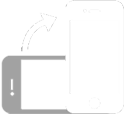
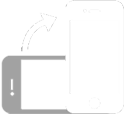

In [23]:
data = driver.page_source
data
data = BeautifulSoup(data,'html.parser')
print(data.prettify())

In [25]:
reg_button = driver.find_element_by_link_text('Register')
reg_button.click()

In [27]:
driver.back()

In [29]:
driver.find_element_by_partial_link_text('Reg').click()

In [39]:
name = driver.find_elements_by_class_name('courseTitle')

type(name)

list

In [40]:
name[0]

<selenium.webdriver.remote.webelement.WebElement (session="c30bf696ff937d5c1b81a0f6c8c1fa1e", element="0.08365722318160529-1")>

In [41]:
name[0].click()


In [42]:
driver.close()

In [49]:
driver = webdriver.Chrome(executable_path = r'C:\Users\venug\Downloads\chromedriver.exe')
driver.get('https://google.com')

In [50]:
textBox = driver.find_element_by_name('q')

+ driver.send_keys sends your text to your element
+ We still need to press enter so submit() method helps with that.

In [51]:
textBox.send_keys('Selenium')
textBox.submit()

+ Task: Search for location from maps.google.com
+ for enter we need to send key u'\ue007'

In [53]:
driver.get('https://maps.google.com')

In [63]:
SearchBox = driver.find_element_by_class_name('tactile-searchbox-input')
SearchButton = driver.find_element_by_class_name('searchbox-searchbutton')

In [74]:
SearchBox.send_keys('Coding Ninjas')
SearchButton.click()
data = driver.page_source
data = BeautifulSoup(data,'lxml')
Address = data.find_all('span',class_ = 'widget-pane-link')
for i in Address:
    if i.text!='':
        print(i.text)

Plot Number 360, Kohat Enclave Main Pitampura Road, Opposite Kohat Metro Station exit 3, New Delhi, Delhi 110034
M4XR+26 Delhi
codingninjas.in
1800 3002 8085
